In [3]:
# Packages required in this section
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

<b>Taylor series</b> play a fundamental role in finite difference method approximations of derivatives.<br>
If a function $f$ is infinitely differentiable, then for any $x_0 \in \mathbb{R}$, it holds that<br>
$f(x)=f(x_0)+f'(x_0)(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+\frac{f'''(x_0)}{3!}(x-x_0)^3+\cdots$<br>
for every single real number $x$. The point $x_0$ is called the point of expansion.<br><br>
<b>Taylor's theorem :</b><br>
If a function is $n+1$ times differentiable, then for any specified expansion point $x_0$, for every real number $x$ there is a number $c$ in the interval $[x,x_0]$ such that<br>
$f(x)=f(x_0)+f'(x_0)(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+ \cdots \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n+\frac{f^{(n+1)}(c)}{(n+1)!}(x-x_0)^{n+1}$<br><br>
We say that $f(x)$ is approximated by a $n$-degree polynomial and the <b>error</b> or <b>remainder</b> term for the approximation is given by <br>
$R_n(x) = \frac{f^{(n+1)}(c)}{(n+1)!}(x-x_0)^{n+1}$

<b>Example 1: </b> Use Taylor's theorem with $n=2$ to approximate $\sin(x)$ at $x=1.1$, using the expansion point $x_0 = 1$. Find a bound on the error using Taylor's theorem and compare the bound to the actual error.<br><br>
<b>Solution : </b><br>
Let us call $f(x)= \sin(x)$<br>
and calculate,
$f(1)=\sin(1), f'(1)=\cos(1), f''(1)=-\sin(1)$<br>
Hence,<br>
$f(x) \approx \sin(1) + \cos(1)(x-1) - \frac{\sin(1)}{2}(x-1)^2$<br>

In [4]:
# Find the approximation
np.sin(1) + np.cos(1)*0.1 - 0.5*np.sin(1)*(0.1)**2

np.float64(0.891293860470671)

So, we obtain<br>
$f(1.1)=\sin(1.1) \approx \sin(1) + \cos(1)(0.1) - \frac{\sin(1)}{2}(0.1)^2 = 0.891293860470671 $

The error term is given as $R(n) = \frac{f'''(c)}{3!}(0.1)^3$, where $c \in [1,1.1]$<br>.
Since since $\mid \cos(c) \mid \leq 1$, we obtain $\mid(R(n)\mid \leq \frac{(0.1)^3}{6}\mid \cos(c) \mid \leq 1.67\times 10^{-4} $.

In [5]:
# Let us calculate the exact error in this block
approx = np.sin(1) + np.cos(1)*0.1 - 0.5*np.sin(1)*(0.1)**2
exact = np.sin(1.1)
error = np.abs(exact-approx)
print ("Approx  = ", approx, ", Exact = ",exact, ", Error = ",error)

Approx  =  0.891293860470671 , Exact =  0.8912073600614354 , Error =  8.650040923563473e-05


### Notice that the above error we obtained is much smaller than the boundary we obtained above.
The reason is that the boundary we obtained above is actually quite relaxed.<br>
We can improve the boundary using the fact that $cosine$ function is a decreasing function in the first quadrant, obtaining,<br>
$c \in [1, 1.1] \Rightarrow \cos(c) \in [\cos(1.1),\cos(1)] = [0.4536,0.5403]$ <br>
Hence,<br>
$\mid(R(n)\mid \leq \frac{(0.1)^3}{6}(0.5403) \leq 9.005\times 10^{-5} $.<br>
which is a much closer boundary for the error.

# Forward and Backward Difference formula

**2 point forward difference:**
$$ f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}, $$

* $ x_{i+1} = x_i + h$

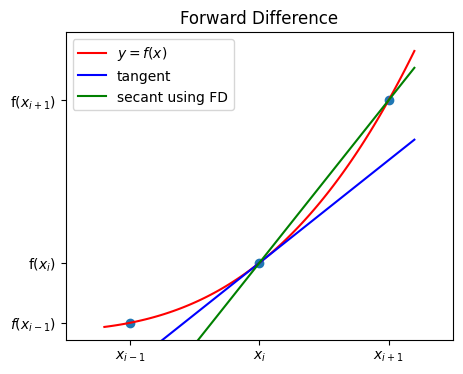

In [6]:
# @title
x=np.linspace(0.8,3.2,100)
y1=x**3
y2 = 12*(x-2)+8
y3 = 19*(x-2)+8

fig = plt.figure(figsize=[5,4])

plt.plot(x,y1,'r',x,y2,'b',x,y3,'g')
plt.xticks([1,2,3],[r'$x_{i-1}$',r'$x_i$',r'$x_{i+1}$'])
plt.yticks([1,8,27],[r'$f(x_{i-1})$',r'f($x_i$)',r'f($x_{i+1})$'])
plt.title('Forward Difference')
plt.legend([r'$y=f(x)$' , 'tangent', 'secant using FD'])
plt.scatter([1,2,3],[1,8,27])
plt.xlim(0.5,3.5)
plt.ylim(-1,35)
plt.show()

#### Example
Use the forward difference method, with varying $h = 2^{-1}, 2^{-2}, 2^{-3}, \cdots$, to approximate the derivative of $f (x) = e^{\sin(x)}$ at $x = 0$.

In [7]:
# Forward difference
# approximating f = exp(sin(x)) at x=0

h = (1/2)**np.array(range(1,11))
fprime = (np.exp(np.sin(h))-np.exp(np.sin(0)))/h
print("{:<20}   {:<20} ".format('h','fprime'))
print("--------------------------------------------")
for i in range(10):
    print("{:<20}   {:<20} ".format(h[i],fprime[i]))

h                      fprime               
--------------------------------------------
0.5                    1.2302925928841675   
0.25                   1.122785429776699    
0.125                  1.0622395011327548   
0.0625                 1.0312184618779803   
0.03125                1.0156211216107778   
0.015625               1.0078120191854794   
0.0078125              1.0039061901468926   
0.00390625             1.0019531175339011   
0.001953125            1.0009765615676542   
0.0009765625           1.0004882811335847   


# Accuracy of Finite Difference
How accurate is the Finite Difference method?

### Numerically,
we can check this by executing the method for $h = 2^{-1}, 2^{-2}, 2^{-3}, \cdots$ and noting the errors in each case.

$$\text{error = |approx. deriv - real deriv.|}$$

Note: For $f(x)=e^{\sin(x)}$ we get $f'(x) = \cos(x) e^{\sin(x)}.$

Recall that, we say error $=O(h^k)$ for
$$k \approx \frac{\ln{\frac{e_2}{e_1}}}{\ln{\frac{h_2}{h_1}}}.$$

In [8]:
# Forward difference error analysis
# approximating f = exp(sin(x)) at x=0

iter = 10
h = (1/2)**np.array(range(1,iter+1))
fprime = (np.exp(np.sin(h))-np.exp(np.sin(0)))/h
err = np.abs(fprime-np.exp(np.sin(0))*np.cos(0))
k = np.array([np.log(err[i+1]/err[i])/np.log(h[i+1]/h[i]) for i in range(len(h)-1)])

print("{:<25}   {:<25}   {:<25}   {:<25}".format('h','fprime', 'error','k'))
print("-"*105)
for i in range(iter):
    if i == 0:
        print("{:<25}   {:<25}   {:<25}".format(h[i],fprime[i], err[i]))
    else:
        print("{:<25}   {:<25}   {:<25}   {:<25}".format(h[i],fprime[i], err[i], k[i-1]))

h                           fprime                      error                       k                        
---------------------------------------------------------------------------------------------------------
0.5                         1.2302925928841675          0.23029259288416748      
0.25                        1.122785429776699           0.12278542977669904         0.9073286343815473       
0.125                       1.0622395011327548          0.06223950113275478         0.9802369728735423       
0.0625                      1.0312184618779803          0.031218461877980275        0.9954310387426207       
0.03125                     1.0156211216107778          0.015621121610777777        0.9989014139995721       
0.015625                    1.0078120191854794          0.0078120191854793575       0.9997306465728975       
0.0078125                   1.0039061901468926          0.0039061901468926408       0.9999333133842404       
0.00390625                  1.001953117533

See that
$$k \approx 1.$$

### Analytically,
Using Taylor series we see that
$$  = f'(x)+\frac{h}{2!}f''(x)+\frac{h^2}{3!}f^{(3)}(x)+ \frac{h^3}{4!}f^{(4)}(x)+\cdots$$
so that,
$$\text{error }= \left| \frac{f(x+h)-f(x)}{h} - f'(x) \right| = O(h) $$

# Backward Difference
**2 point backward difference:**
$$ f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}, $$

* $x_{i-1} = x_i - h$

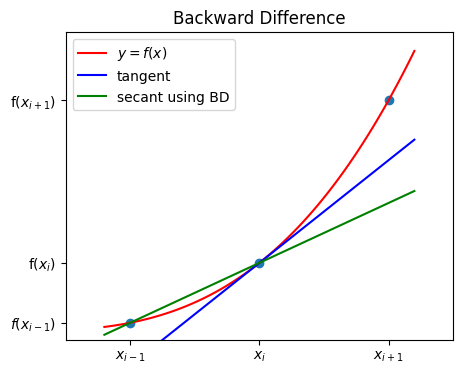

In [9]:
# @title
x=np.linspace(0.8,3.2,100)
y1=x**3
y2 = 12*(x-2)+8
y3 = 7*(x-2)+8

fig = plt.figure(figsize=[5,4])

plt.plot(x,y1,'r',x,y2,'b',x,y3,'g')
plt.xticks([1,2,3],[r'$x_{i-1}$',r'$x_i$',r'$x_{i+1}$'])
plt.yticks([1,8,27],[r'$f(x_{i-1})$',r'f($x_i$)',r'f($x_{i+1})$'])
plt.title('Backward Difference')
plt.legend([r'$y=f(x)$' , 'tangent', 'secant using BD'])
plt.scatter([1,2,3],[1,8,27])

plt.xlim(0.5,3.5)
plt.ylim(-1,35)
plt.show()

### What is the accuracy of the backward difference formula?

# Centered Difference formula
Geometrically it makes sense to use the following formula for a better approximation,

$$ f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h} = \frac{f(x_i + h) - f(x_i - h)}{2h}, $$


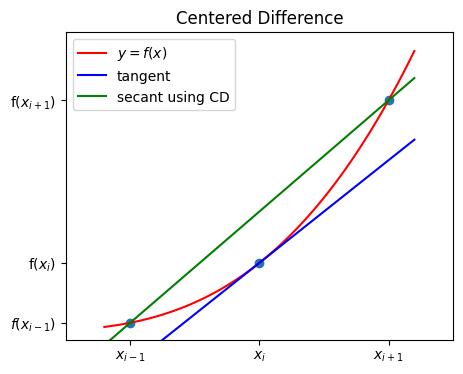

In [10]:
# @title
x=np.linspace(0.8,3.2,100)
y1=x**3
y2 = 12*(x-2)+8
y3 = 13*(x-1)+1

fig = plt.figure(figsize=[5,4])

plt.plot(x,y1,'r',x,y2,'b',x,y3,'g')
plt.xticks([1,2,3],[r'$x_{i-1}$',r'$x_i$',r'$x_{i+1}$'])
plt.yticks([1,8,27],[r'$f(x_{i-1})$',r'f($x_i$)',r'f($x_{i+1})$'])
plt.title('Centered Difference')
plt.legend([r'$y=f(x)$' , 'tangent', 'secant using CD'])
plt.scatter([1,2,3],[1,8,27])
plt.xlim(0.5,3.5)
plt.ylim(-1,35)
plt.show()

### Exercise:
Show that the for a small change $h$ the centered difference method is $O(h^2).$

### Exercise:
Use numerical technique to estimate the order of convergence $k$ for the error in centered difference approximation of first derivative for the function $f(x) = e^{\sin(x)}$ at $x=0$.


In [28]:
# Centered difference error analysis
# approximating f = exp(sin(x)) at x=0
iter =10

h = (1/2)**np.array(range(1,iter+1))
fprime = (np.exp(np.sin(h))-np.exp(np.sin(-h)))/(2*h)
err = np.abs(fprime-np.exp(np.sin(0))*np.cos(0))
k = np.array([np.log(err[i+1]/err[i])/np.log(h[i+1]/h[i]) for i in range(len(h)-1)])

print("{:<25}   {:<25}   {:<25}   {:<25}".format('h','fprime', 'error','k'))
print("-"*105)
for i in range(iter):
    if i == 0:
        print("{:<25}   {:<25}   {:<25}".format(h[i],fprime[i], err[i]))
    else:
        print("{:<25}   {:<25}   {:<25}   {:<25}".format(h[i],fprime[i], err[i], k[i-1]))

h                           fprime                      error                       k                        
---------------------------------------------------------------------------------------------------------
0.5                         0.9960073353443525          0.003992664655647515     
0.25                        0.9997422983982882          0.0002577016017117906       3.953578495713888        
0.125                       0.9999837663540765          1.6233645923513507e-05      3.9886425470481006       
0.0625                      0.9999989834097107          1.0165902892822487e-06      3.9971767918502055       
0.03125                     0.9999999364320615          6.356793846862274e-08       3.9992952427008377       
0.015625                    0.9999999960265171          3.973482876062917e-09       3.999823269881458        
0.0078125                   0.9999999997516511          2.483488970028702e-10       3.99996388264013         
0.00390625                  0.999999999984

### Note that,
the order of convergence $ k \approx 4$, i.e.,
$$\text{error} = O(h^4).$$
### Why?

Note:
$$
f(x) = e^{\sin(x)}
f'(x) = \cos(x) \dot e^{\sin(x)}
$$


In [29]:
# Centered difference error analysis
# approximating f = sin(x) at x=1
iter = 10

h = (1/2)**np.array(range(1,iter+1))
fprime = (np.sin(1+h)-np.sin(1-h))/(2*h)
err = np.abs(fprime-np.cos(1))

k = np.array([np.log(err[i+1]/err[i])/np.log(h[i+1]/h[i]) for i in range(len(h)-1)])

print("{:<25}   {:<25}   {:<25}   {:<25}".format('h','fprime', 'error','k'))
print("-"*105)
for i in range(iter):
    if i == 0:
        print("{:<25}   {:<25}   {:<25}".format(h[i],fprime[i], err[i]))
    else:
        print("{:<25}   {:<25}   {:<25}   {:<25}".format(h[i],fprime[i], err[i], k[i-1]))

h                           fprime                      error                       k                        
---------------------------------------------------------------------------------------------------------
0.5                         0.5180694479998514          0.022232857868288325     
0.25                        0.5346917186645042          0.005610587203635609        1.986469731783804        
0.125                       0.5388963674522724          0.001405938415867336        1.9966183694744863       
0.0625                      0.5399506152510245          0.0003516906171152634       1.999154651224361        
0.03125                     0.5402143703335476          8.793553459218728e-05       1.9997886664888502       
0.015625                    0.5402803211794023          2.198468873748638e-05       1.9999471668749274       
0.0078125                   0.5402968096456391          5.496222500678272e-06       1.999986792489135        
0.00390625                  0.540300931809

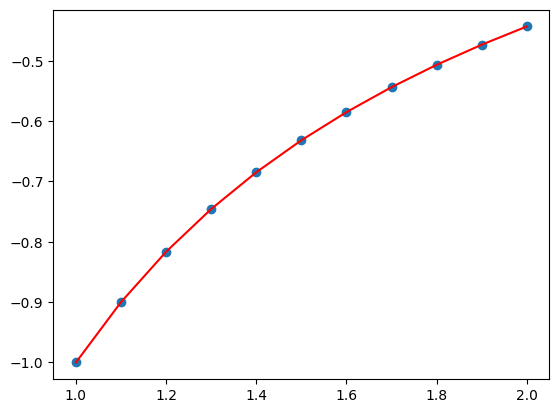

In [13]:
# Forward Euler method for solving
# Initial Value Ordinary Differential Equation
def forwardEuler(func,time,y0):
    N = len(time)
    y = np.zeros(N)

    y=[y0]

    for i in range(N-1):
        y.append(y[i] + (time[i+1]-time[i])*func(time[i],y[i]))

    return y

def func(t,y):
    return 1/(t**2) - y/t - y**2

t = np.linspace(1,2,11)
y=forwardEuler(func,t,-1)

plt.plot(t,y,'r')
plt.scatter(t,y)
plt.show()

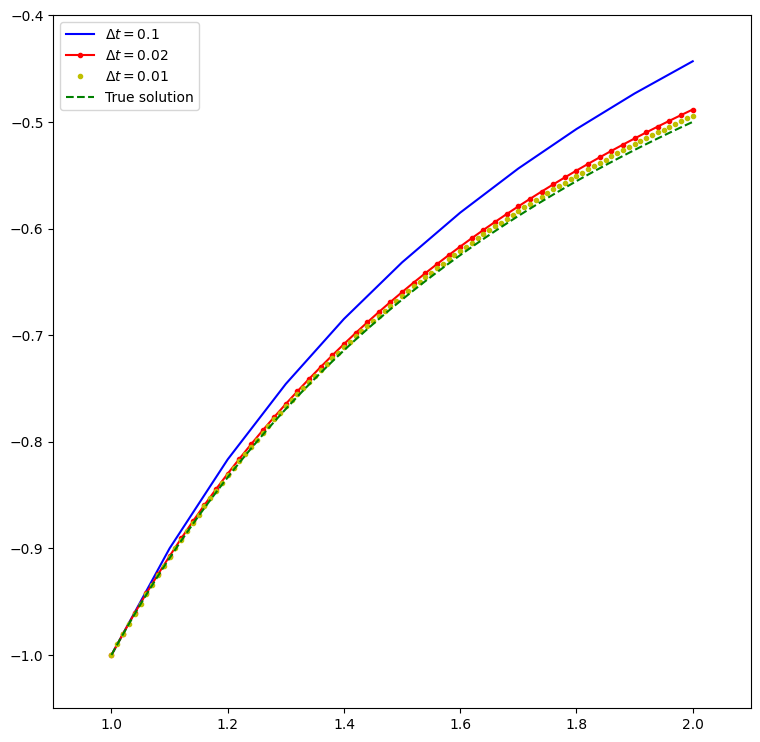

In [14]:
t11=np.linspace(1,2,11)
y11=forwardEuler(func,t11,-1)

t51=np.linspace(1,2,51)
y51=forwardEuler(func,t51,-1)

t101=np.linspace(1,2,101)
y101=forwardEuler(func,t101,-1)

ytrue = -1/t101

fig=plt.figure(figsize=[9,9])
plt.subplot(1,1,1)
plt.xlim(0.9,2.1)
plt.ylim(-1.05,-0.4)
plt.plot(t11,y11,'b',
         t51,y51,'r.-',
         t101,y101,'y.',
         t101,ytrue,'g--')
plt.legend([r'$\Delta t = 0.1$',
            r'$\Delta t = 0.02$',
            r'$\Delta t = 0.01$',
            'True solution'])
plt.show()

In [15]:
# Error
err11=np.linalg.norm(y11-(-1/t11))
err51=np.linalg.norm(y51-(-1/t51))
err101=np.linalg.norm(y101-(-1/t101))

print('error for h = 0.1 :', err11)
print('error for h = 0.02 :', err51)
print('error for h = 0.01 :', err101)

error for h = 0.1 : 0.12250203483091805
error for h = 0.02 : 0.052943672392132414
error for h = 0.01 : 0.03726854088121141


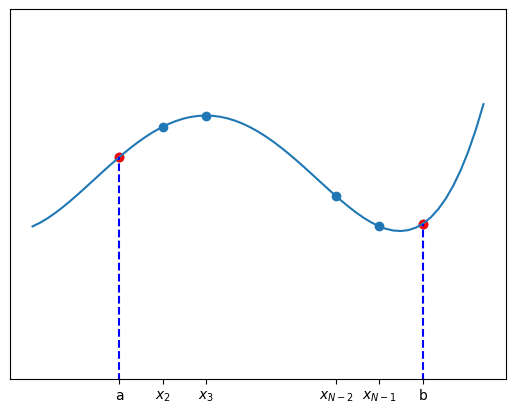

In [16]:
x=np.linspace(0.5,3.1,61)
y=x*(x-1)*(x-2)*(x-3)

x1=np.array([1,1.25,1.5,2.25,2.5,2.75])
y1=x1*(x1-1)*(x1-2)*(x1-3)

x2=np.array([1,2.75])
y2=x2*(x2-1)*(x2-2)*(x2-3)

plt.plot(x,y)
plt.scatter(x1,y1)
plt.scatter(x2,y2,color='r')

plt.plot((1,1), (-5, 0),'b--', scaley = False)
plt.plot((2.75,2.75), (-5, -2.75*1.75*0.75*0.25),'b--', scaley = False)

plt.xticks(x1,['a',r'$x_2$',r'$x_3$',r'$x_{N-2}$',r'$x_{N-1}$','b'])
plt.yticks([])
plt.ylim(-3,2)

plt.show()

In [17]:
# Back-substitution to solve triangular system
def BackSubstitution(A,b):
    n=len(b)
    x=np.zeros(n)

    for i in range(n-1,-1,-1):
        # Check if the matrix is singular
        if A[i][i]==0:
            print("Matrix Singularity: Triangular Matrix has zero in diagonal")
            return

        # Compute solution
        x[i] = b[i]/A[i][i]

        # Update the RHS vector
        for j in range(i):
            b[j]=b[j]-A[j][i]*x[i]

    return x


In [18]:
A=np.array([[1,2,3],[0,4,5],[0,0,6]])
b=np.transpose(np.array([1,-5,-6]))
print("Solution : ",BackSubstitution(A,b))

Solution :  [ 4.  0. -1.]


In [19]:
def GaussianElimination(A,b):
    n=len(b)
    for i in range(n-1):
        for j in range(i+1,n):
            m=A[j][i]/A[i][i]
            A[j,:]=A[j,:]-m*A[i,:]
            b[j]=b[j]-m*b[i]
    return A,b

In [20]:
b=np.array([1,5,0])
A=np.array([[2,-1,1],[4,1,-1],[1,1,1]])
print(A,'\n\n',b)
A,b=GaussianElimination(A,b)
print(A,'\n\n',b)

[[ 2 -1  1]
 [ 4  1 -1]
 [ 1  1  1]] 

 [1 5 0]
[[ 2 -1  1]
 [ 0  3 -3]
 [ 0  0  1]] 

 [ 1  3 -1]


In [21]:
print(BackSubstitution(A,b))

[ 1.  0. -1.]


In [22]:
np.ones(5)
np.diag([1,2,3])
np.diag([1,2,3],1)
np.diag(np.ones(5),1)
N=5

-2*np.diag(np.ones(N))+ \
    np.diag(np.ones(N-1),1)+ \
    np.diag(np.ones(N-1),-1)

[1]+list(BackSubstitution(A,b))+[4]

[1, np.float64(1.0), np.float64(-1.0), np.float64(-1.0), 4]

In [23]:
def boundaryValueODE(func,a,b,N,ua,ub):
    x=np.linspace(a,b,N)
    h=(b-a)/(N-1)

    A=(-2)*np.diag(np.ones(N-2))+ \
        np.diag(np.ones(N-3),1)+ \
        np.diag(np.ones(N-3),-1)

    b=(h**2)*func(x[1:N-1])
    b[0]-=ua
    b[-1]-=ub

    A,b=GaussianElimination(A,b)
    u=BackSubstitution(A,b)

    return x, [ua]+list(u)+[ub]

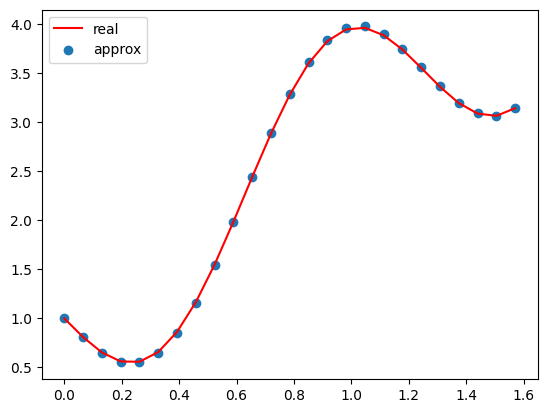

In [24]:
def f(x):
    return 25*np.sin(5*x)
a=0
b=np.pi/2
N=25
ua=1
ub=np.pi
x,u=boundaryValueODE(f,a,b,N,ua,ub)
uReal=-np.sin(5*x)+2*x+1
plt.plot(x,uReal,'r')
plt.scatter(x,u)
plt.legend(['real','approx'],loc='upper left')
plt.show()

In [25]:
def boundaryValueProblem(func,a,b,N,ua,ub,alpha,beta,gamma):
    x=np.linspace(a,b,N)
    h=(b-a)/N

    A=((-2)*alpha/(h**2)+gamma)*np.eye(N-2)+ \
        (alpha/(h**2)+beta/(2*h))*np.diag(np.ones(N-3),1)+ \
        (alpha/(h**2)-beta/(2*h))*np.diag(np.ones(N-3),-1)


    b=func(x[1:N-1])
    b[0] -= alpha*ua/h**2-beta*ua/(2*h)
    b[-1] -= alpha*ub/h**2+beta*ub/(2*h)

    A,b=GaussianElimination(A,b)
    u=BackSubstitution(A,b)


    return x, [ua]+list(u)+[ub]

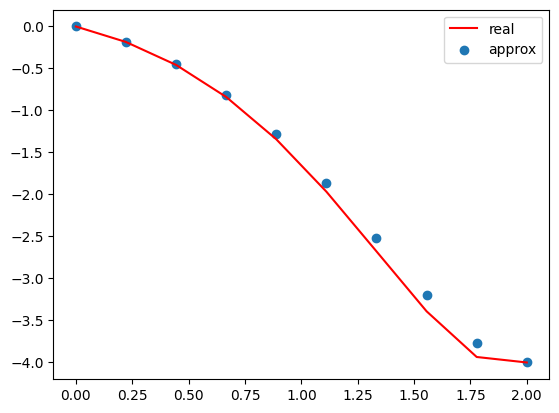

In [26]:
def f(x):
    return np.multiply(x,np.exp(x))-x
a=0
b=2
N=10
ua=0
ub=-4
alpha=1
beta=-2
gamma=1
x,u=boundaryValueProblem(f,a,b,N,ua,ub,alpha,beta,gamma)
uReal=(1/6)*x**3*np.exp(x)-(5/3)*x*np.exp(x)+2*np.exp(x)-x-2
plt.plot(x,uReal,'r')
plt.scatter(x,u)
plt.legend(['real','approx'],loc='upper right')
plt.show()